<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Sep/Ejercicio-09-09-2023/Ejercicio_09_09_2023(trabajo1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


warnings.filterwarnings('ignore')

# Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
file_path = "/content/drive/MyDrive/Machine-Learning-2023/CarPrice_Assignment.csv"
df = pd.read_csv(file_path)


In [83]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#Separate Numerical and  Categorical data

In [84]:
# Seleccionar columnas de interés
columns_of_interest = df.columns[:26]
df = df[columns_of_interest]

# Obtener información sobre los tipos de datos de cada columna
info_tipos_datos = df.dtypes

# Crear listas para almacenar las columnas numéricas y categóricas
columnas_numericas = [columna for columna, tipo in info_tipos_datos.items() if pd.api.types.is_numeric_dtype(tipo)]
columnas_categoricas = [columna for columna, tipo in info_tipos_datos.items() if not pd.api.types.is_numeric_dtype(tipo)]

print("Columnas Numéricas:")
print(columnas_numericas)

print("\nColumnas Categóricas:")
print(columnas_categoricas)


Columnas Numéricas:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas Categóricas:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


#Analiza la dependencia del valor del auto como función de cada variable categorica

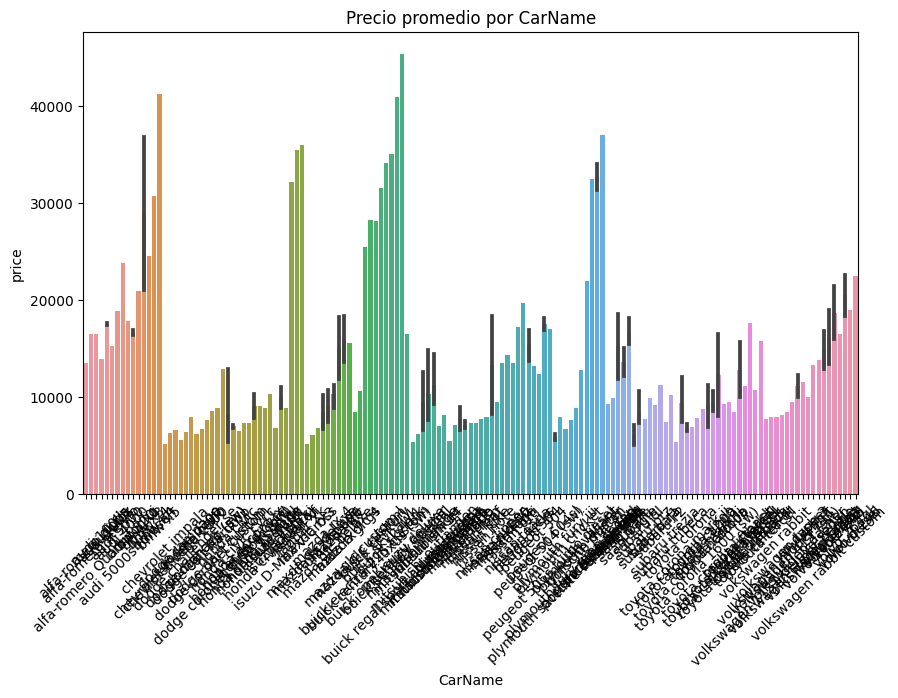

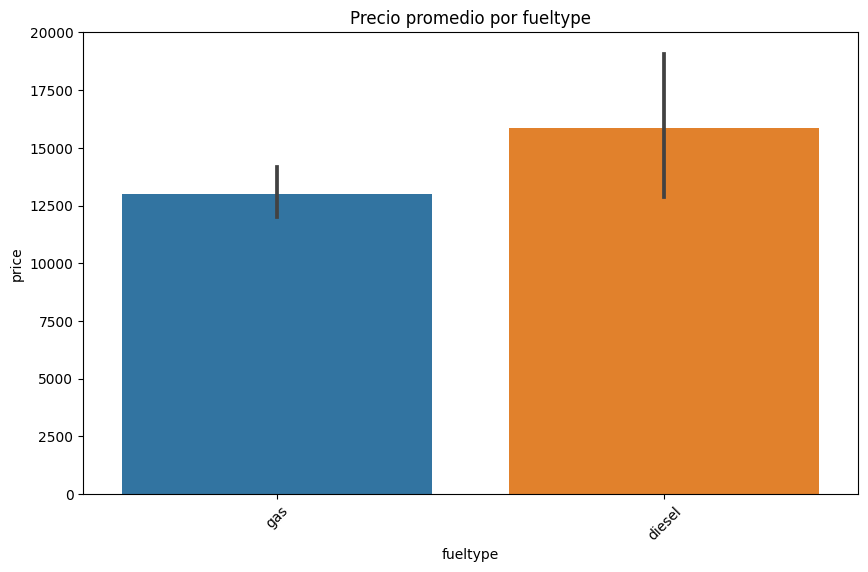

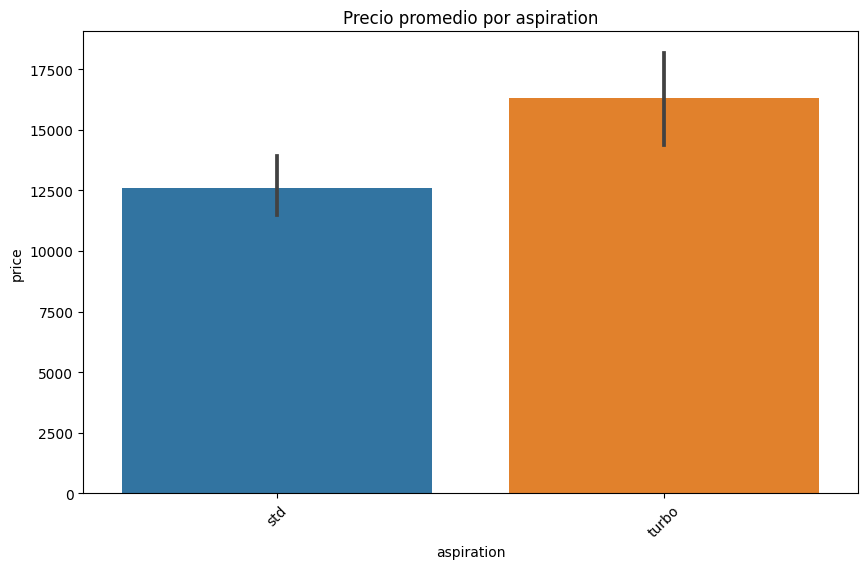

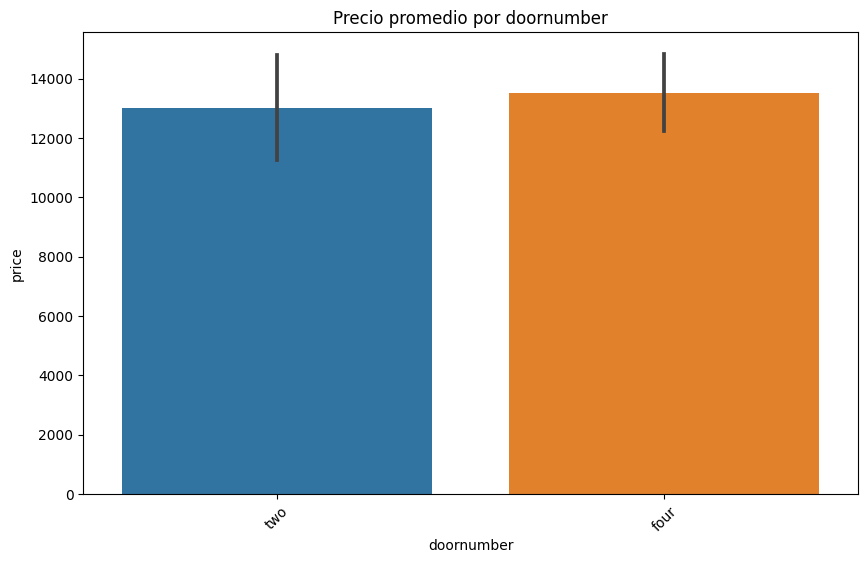

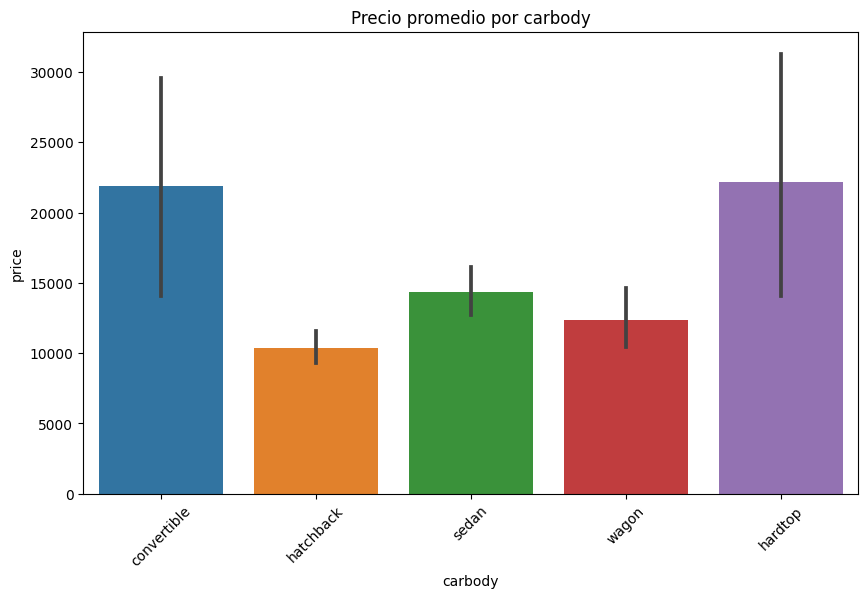

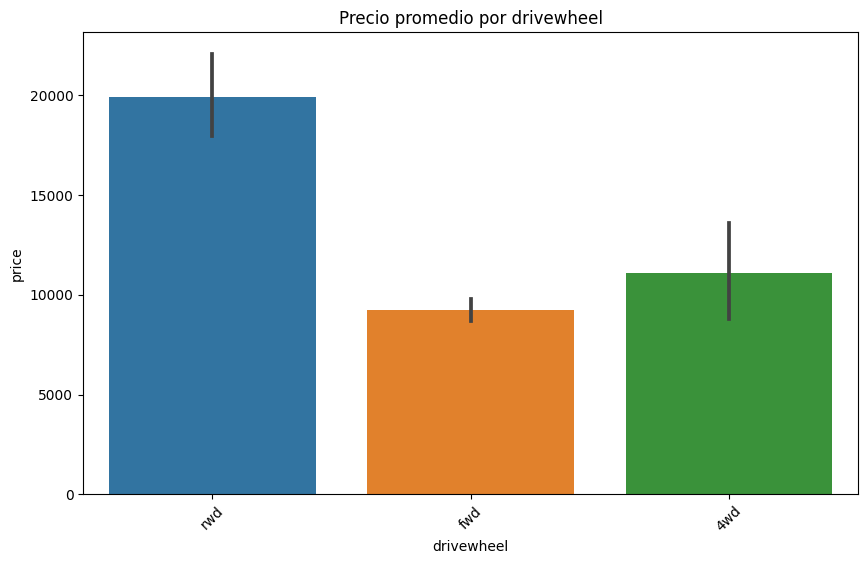

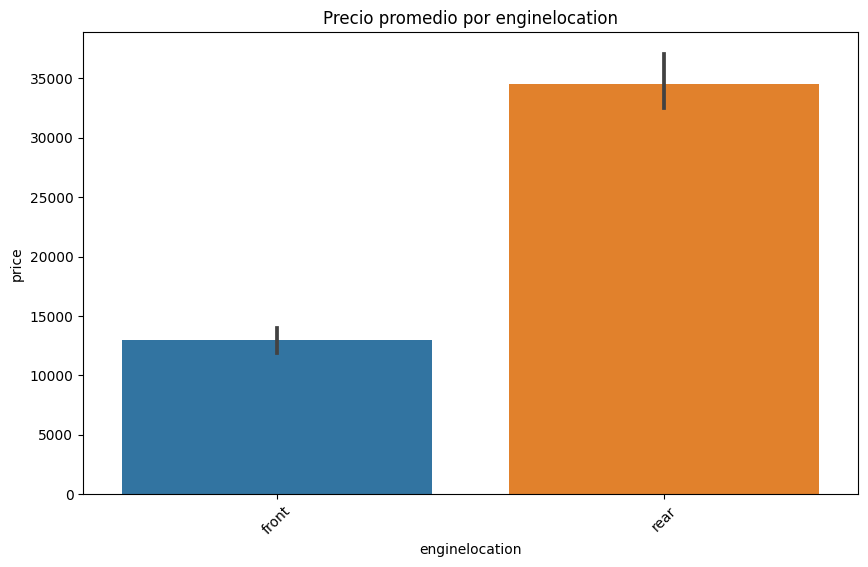

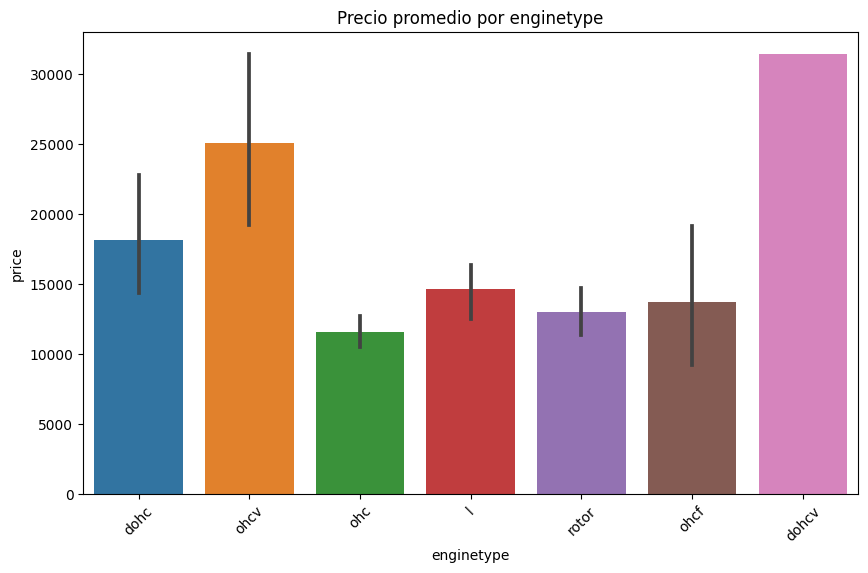

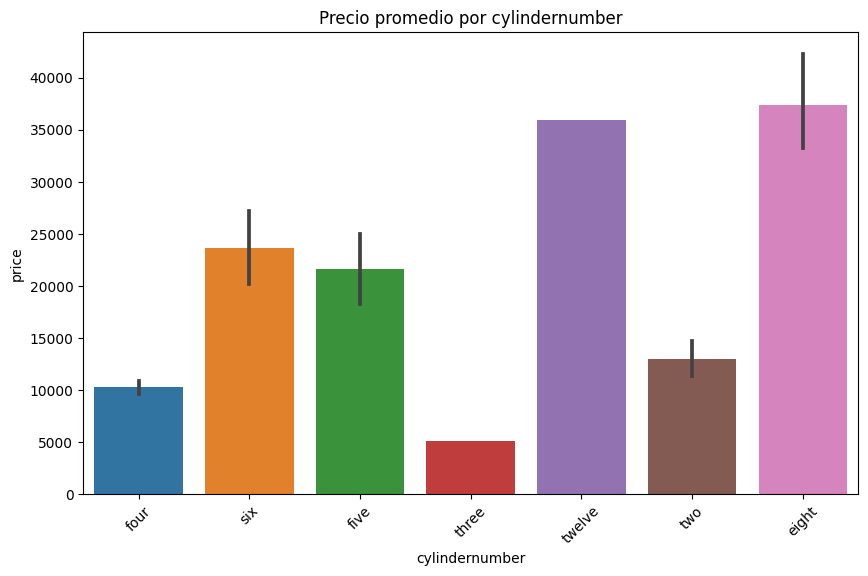

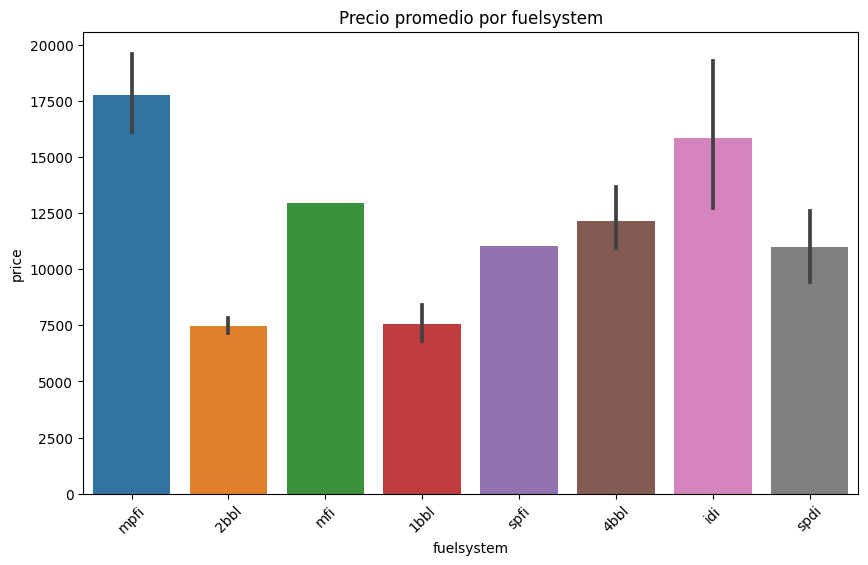

In [85]:
#Categorización por medio de boxplot
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=columna_categorica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_categorica}')
    plt.show()

#Basando la información en los gráficos obtenidos, es posible ver que hay algunas gráficas que no aportan mucha información sobre el precio del auto, por ende, esas no nos darían un buen análisis de los precios, así que es fácil determinar que se pueden filtrar del análisis.

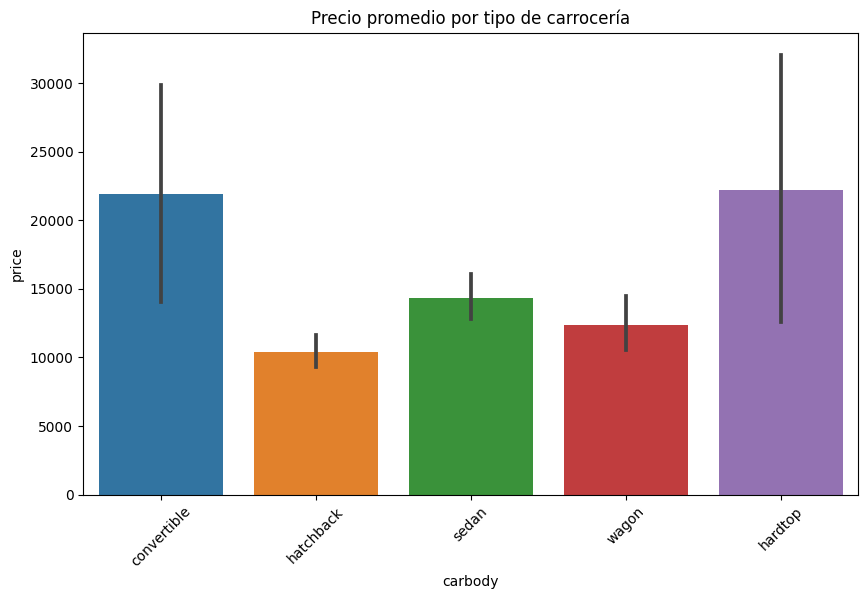

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(x='carbody', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Precio promedio por tipo de carrocería')
plt.show()

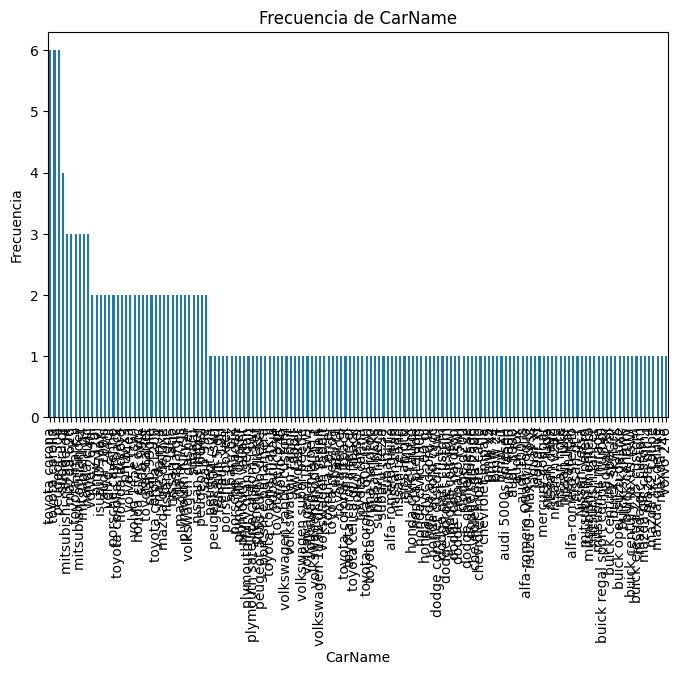

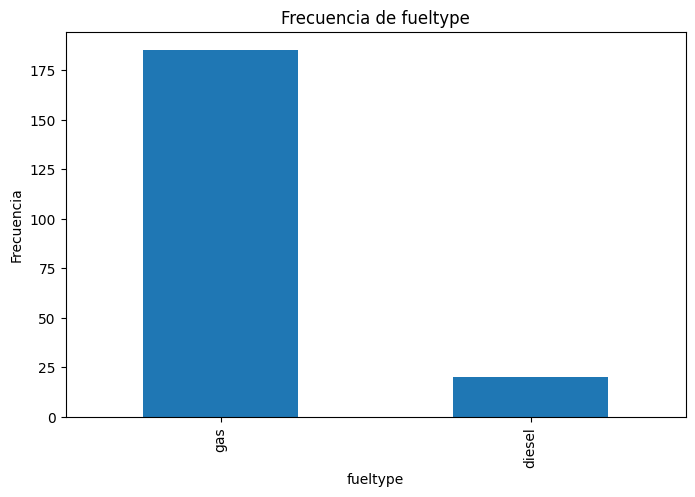

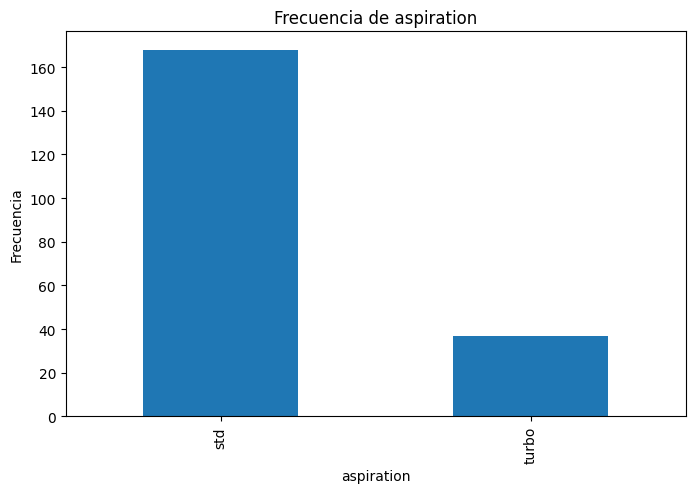

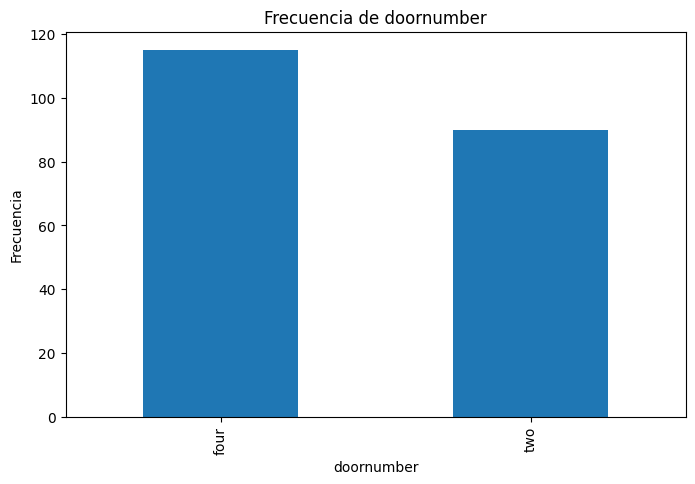

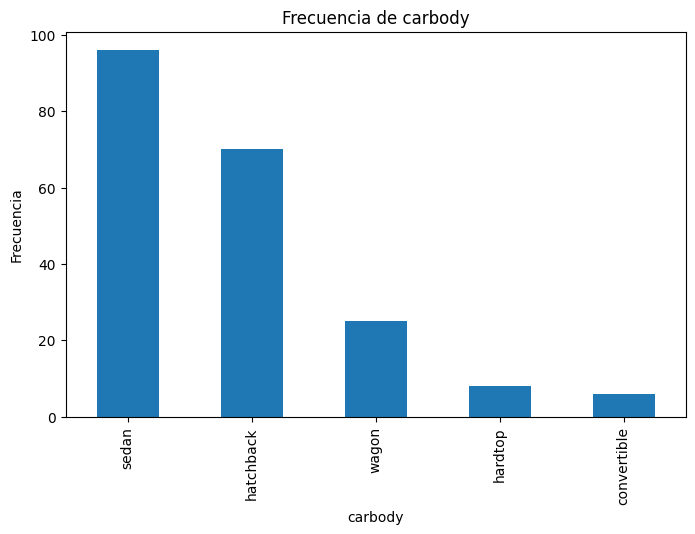

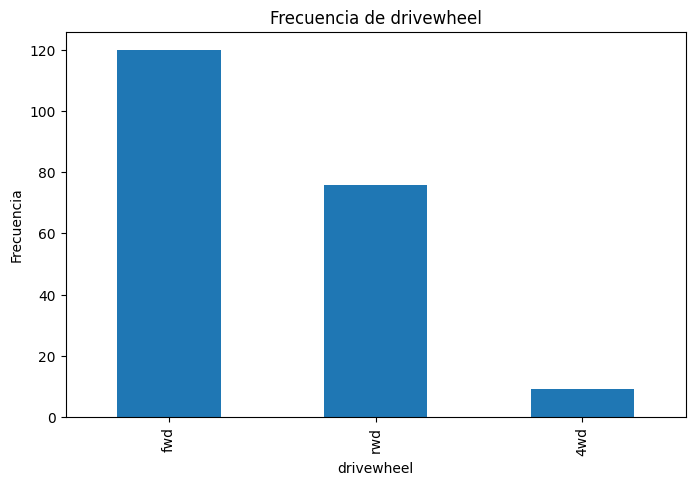

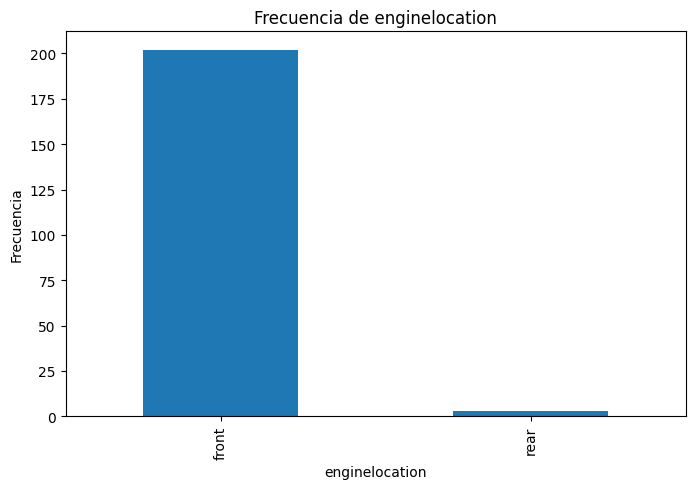

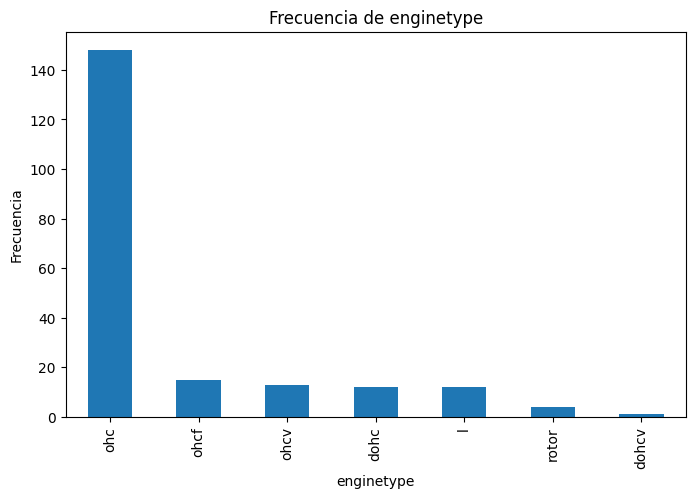

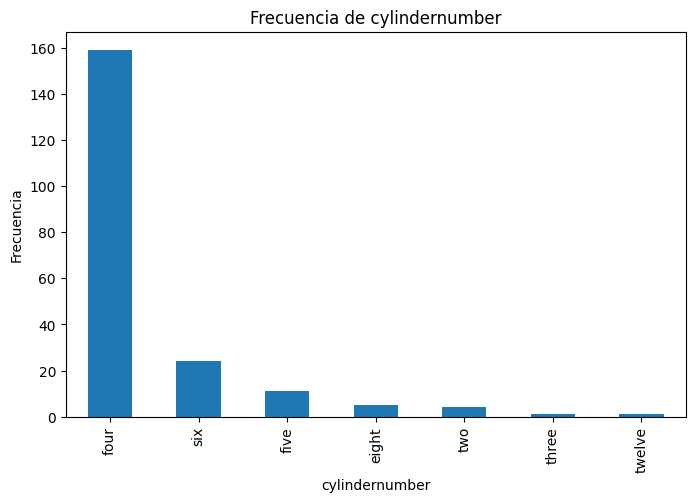

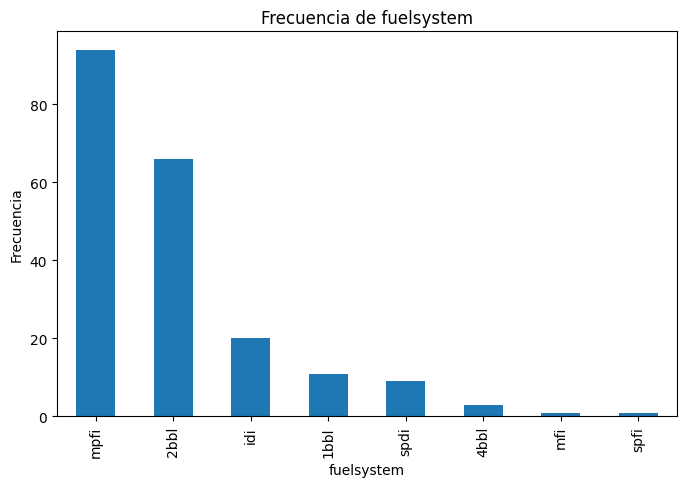

In [87]:
#Para análisis de frecuencia, aunque no sé si puede ser un buen parámetro de categorización
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(8, 5))
    df[columna_categorica].value_counts().plot(kind='bar', stacked=True)
    plt.title(f'Frecuencia de {columna_categorica}')
    plt.xlabel(columna_categorica)
    plt.ylabel('Frecuencia')
    plt.show()

#Analiza la dependencia del valor del auto como función de cada variable numerica

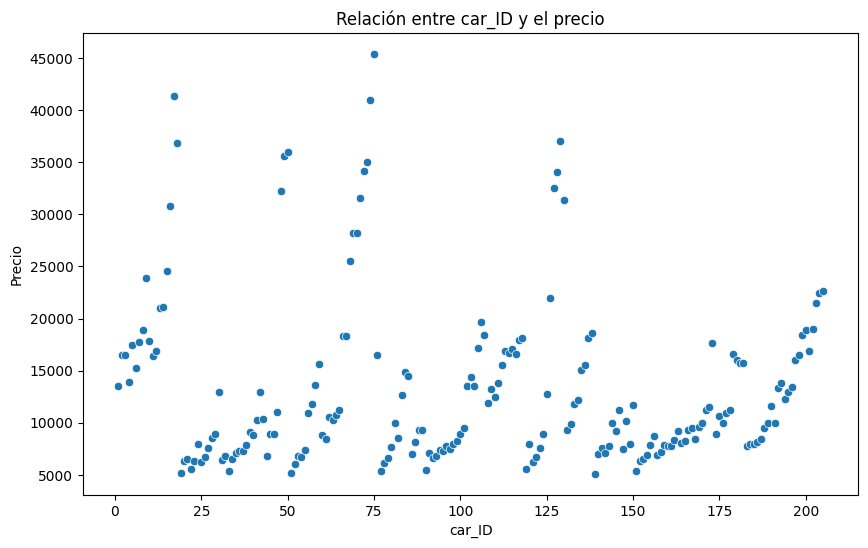

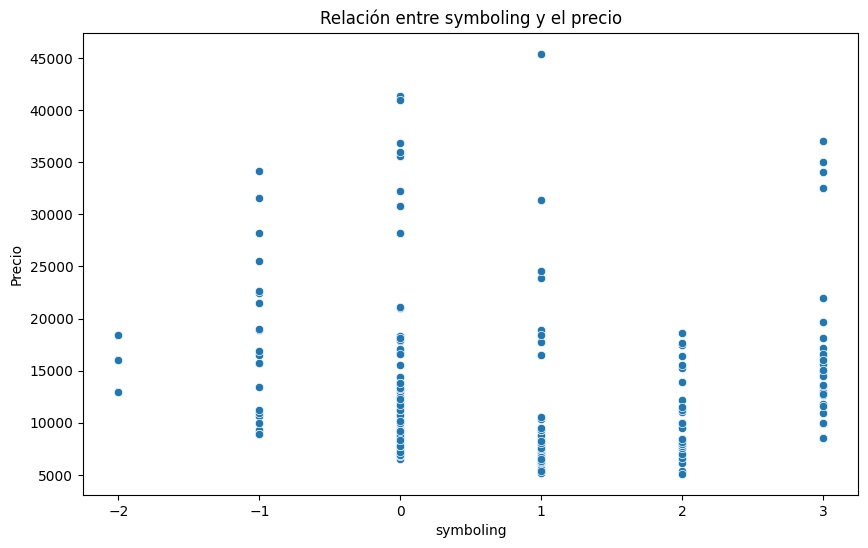

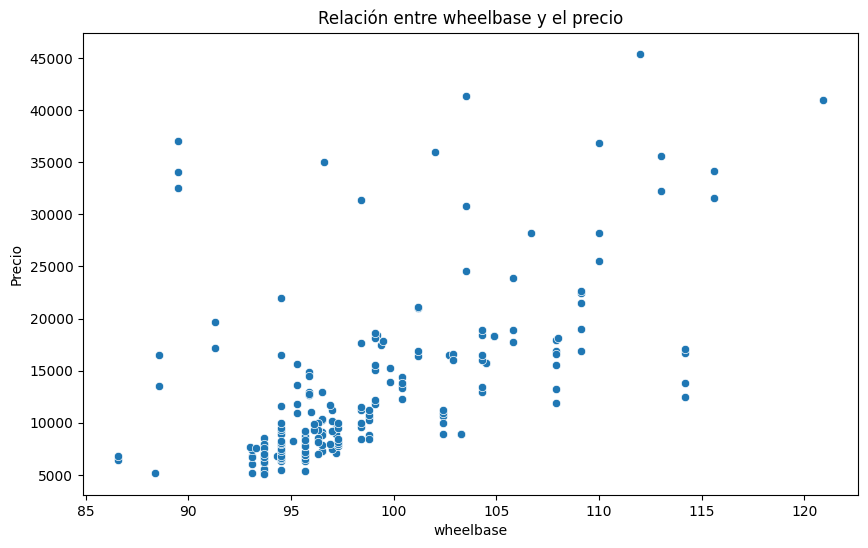

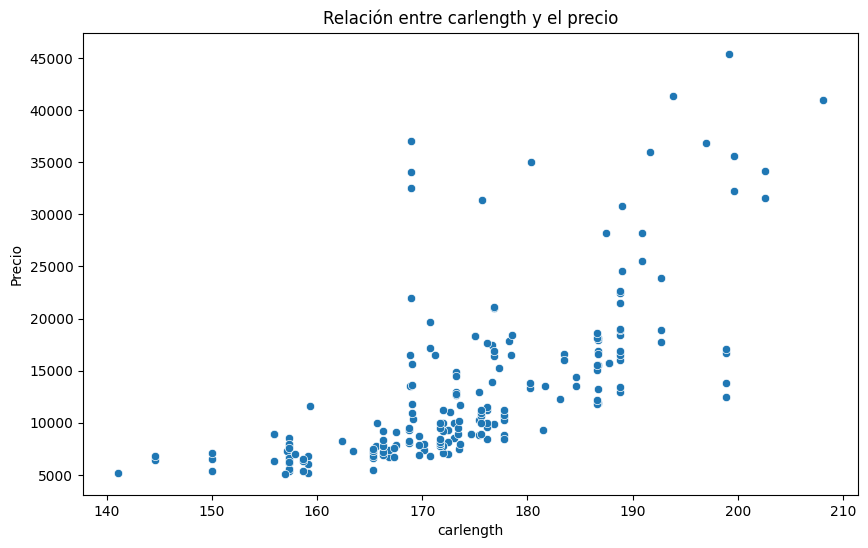

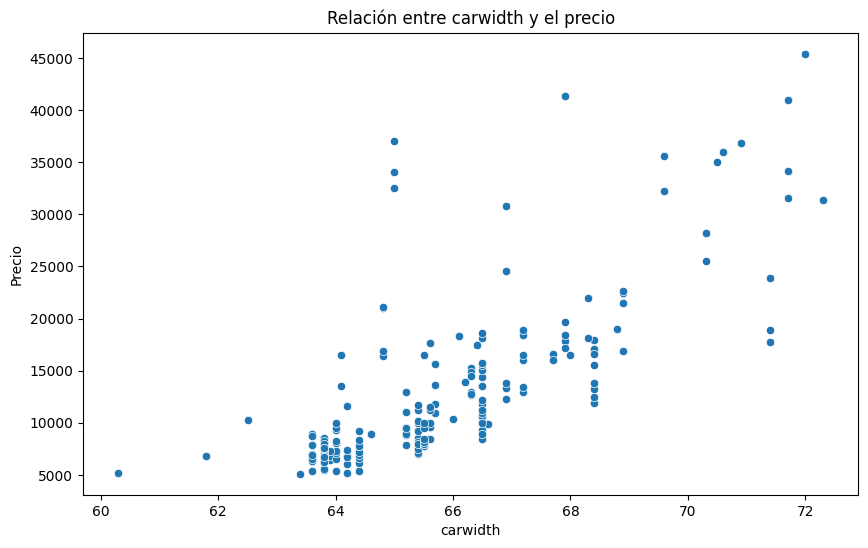

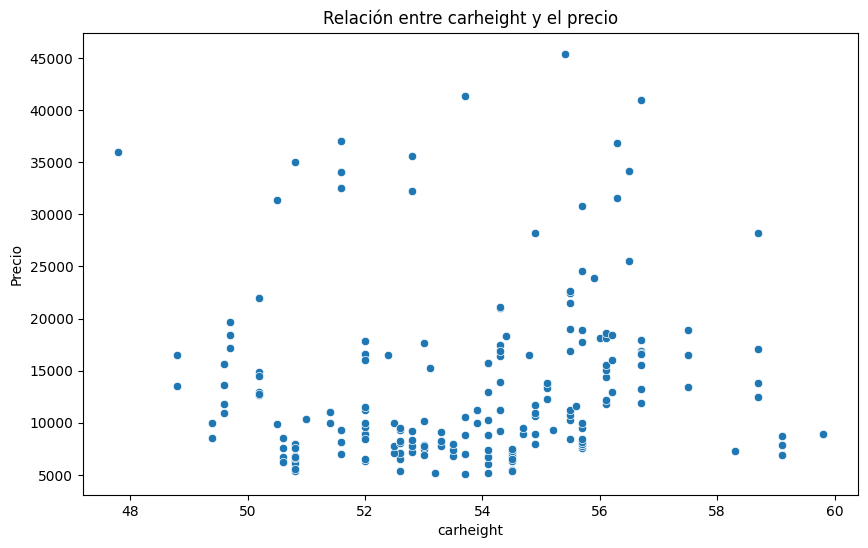

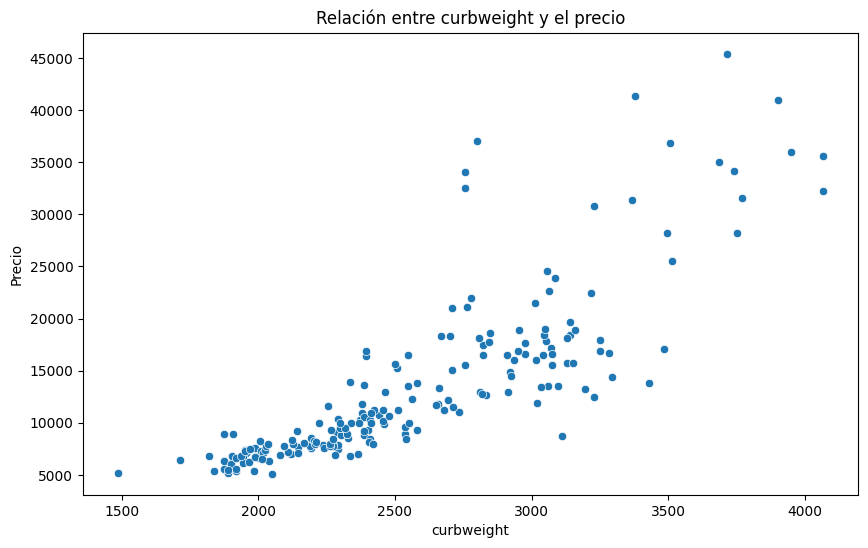

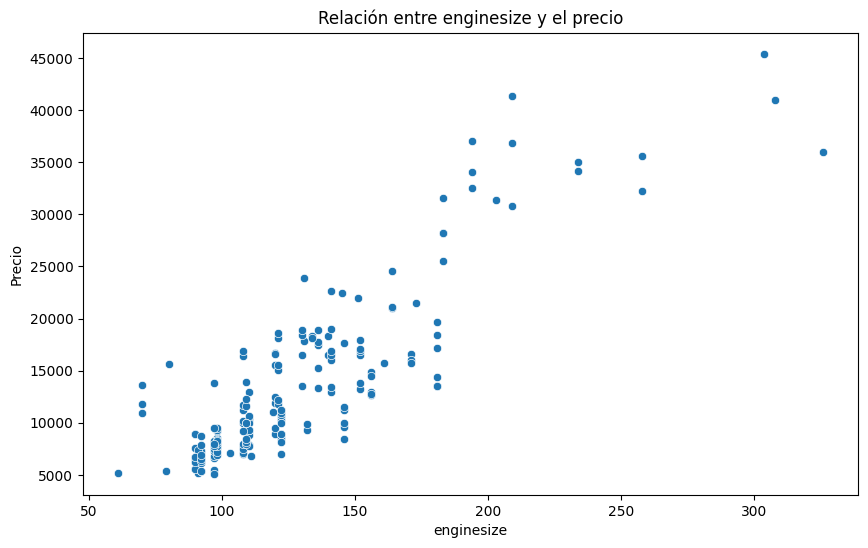

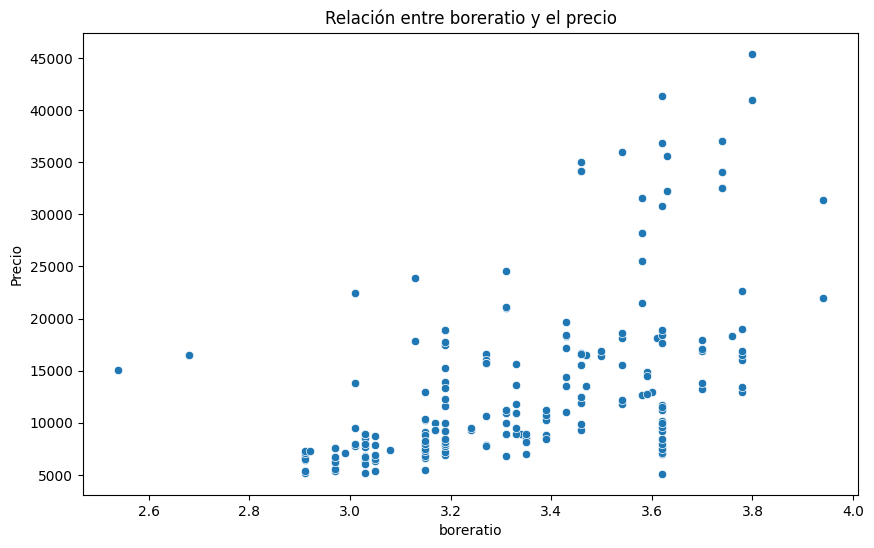

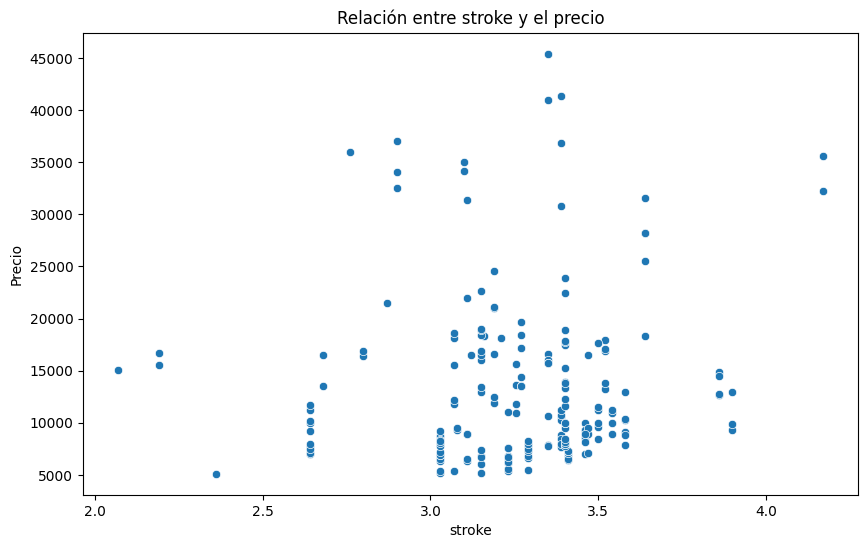

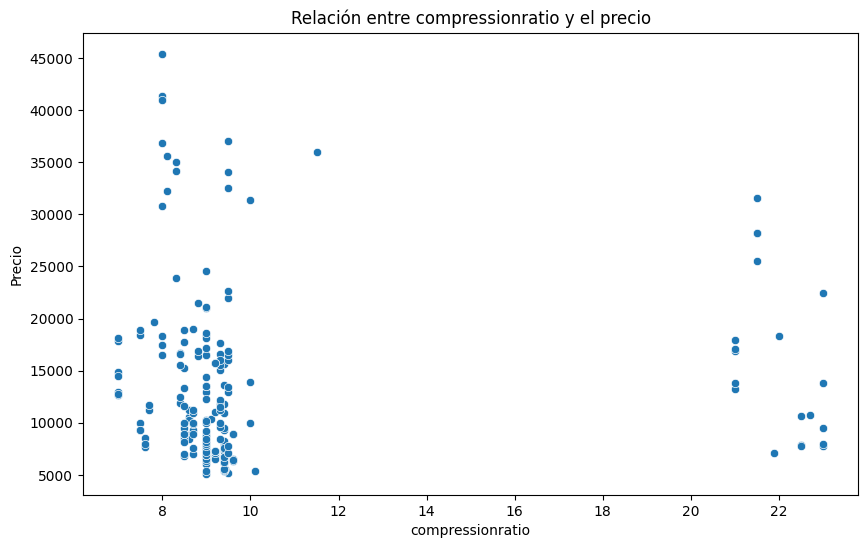

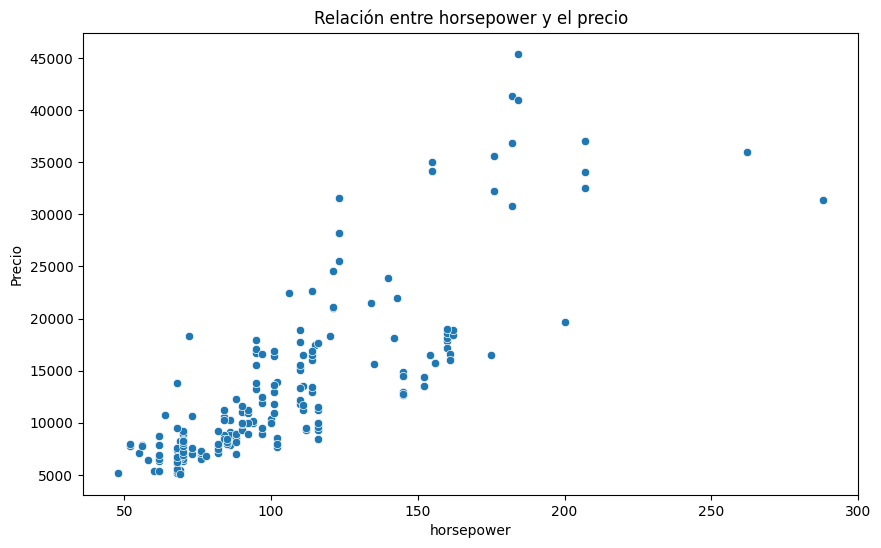

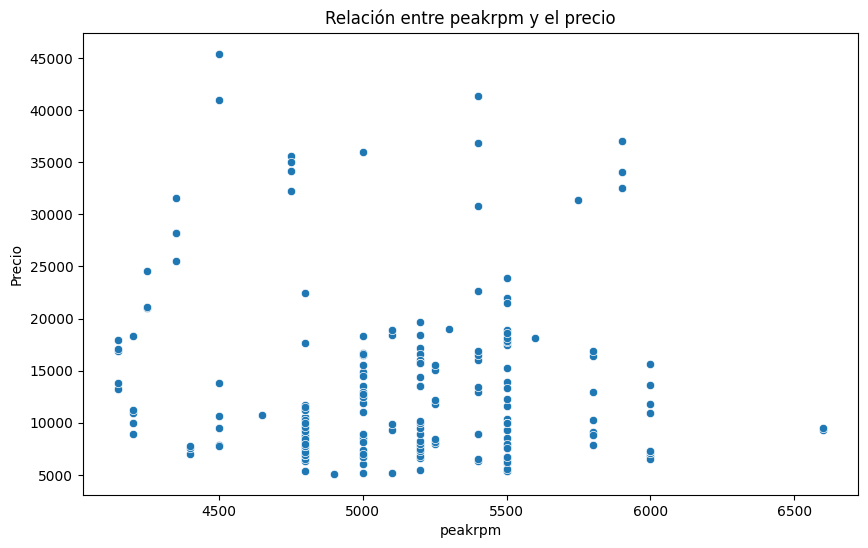

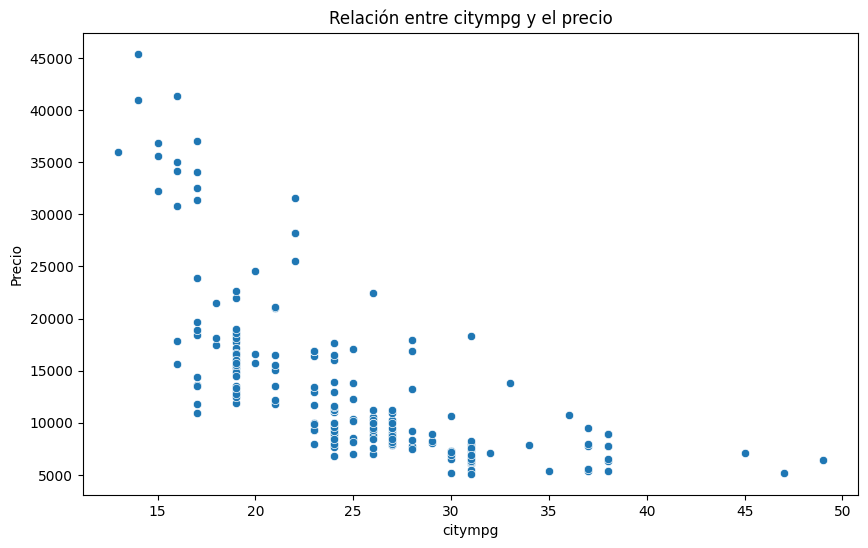

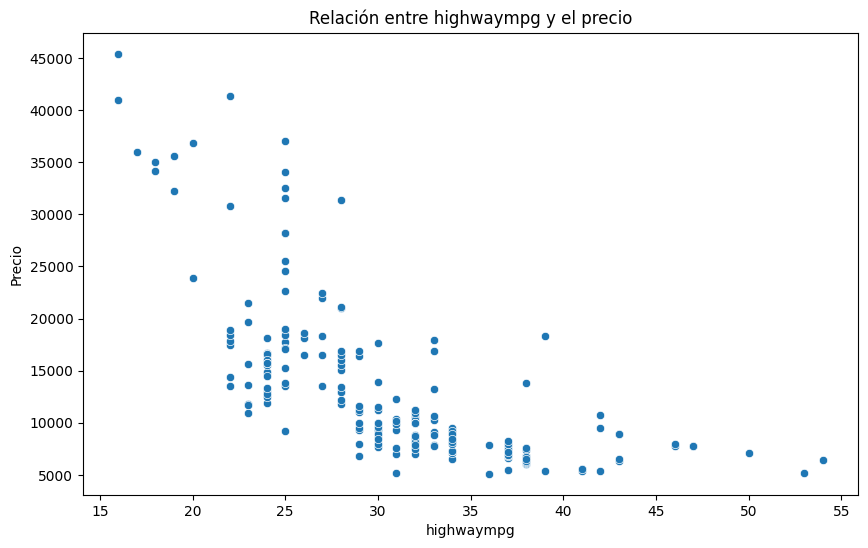

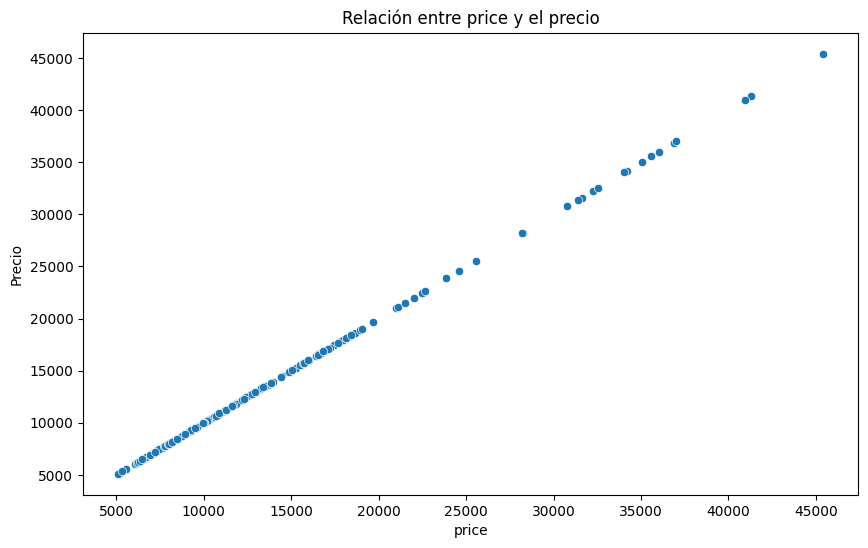

In [88]:
# Realizar un gráfico de dispersión para cada columna numérica
for columna_numerica in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=columna_numerica, y='price', data=df)
    plt.title(f'Relación entre {columna_numerica} y el precio')
    plt.xlabel(columna_numerica)
    plt.ylabel('Precio')
    plt.show()

#Define que variables numericas y categoricas usarás para crear tu modelo lineal.

In [ ]:
# Define las variables numéricas y categóricas a utilizar
use_vars = ['symboling', 'curbweight', 'enginesize', 'carheight', 'boreratio', 'stroke', 'citympg', 'highwaympg', 'horsepower', 'peakrpm']
categorical_vars = ['fueltype', 'enginetype', 'carbody', 'cylindernumber', 'fuelsystem', 'drivewheel','enginelocation']

#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df_categoricas_dummies = pd.get_dummies(df[categorical_vars])

# Calcular la correlación entre todas las variables
fig, ax = plt.subplots(1, 1, figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [90]:
#Construye la matriz de caracteristicas X y el vector de target t.
# Concatenar las variables numéricas y las variables "dummy"
X = pd.concat([df[use_vars], df_categoricas_dummies], axis=1)
# Variable objetivo
t = df['price']
#Normaliza las caracteristicas y procede a generar el modelo.
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [96]:
#Separando datos en un conjunto de entrenamiento y un conjunto de validación
# Usa el 20% de los datos como conjunto de validación
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.2, random_state=42)

In [ ]:
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Capa de salida con activación lineal para regresión

model.compile(optimizer='adam', loss='mean_squared_error')  # Compila el modelo

# Entrena el modelo
history = model.fit(X_train, t_train, epochs=100, batch_size=32, validation_data=(X_val, t_val))

In [ ]:
# Define una lista de tasas de aprendizaje para experimentar
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Crea una lista para almacenar las pérdidas finales
final_losses = []

# Entrenar el modelo con diferentes tasas de aprendizaje
for learning_rate in learning_rates:
    # Crear un modelo de red neuronal simple
    model = Sequential()
    model.add(Dense(units=1, input_dim=X.shape[1], activation='linear'))

    # Compilar el modelo con la tasa de aprendizaje actual
    sgd = SGD(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=sgd)


    # Entrenar el modelo
    history = model.fit(X, t, epochs=100, verbose=0)

    # Registrar la pérdida final después del entrenamiento
    final_loss = history.history['loss'][-1]
    losses.append(final_loss)

In [ ]:
# Posteriormente utiliza scikit-learn para comprobar tu resultado



SGDRegressor(learning_rate='constant', max_iter=100)
number of iterations completed: 7, number of weight updates: 1436.0
model parameters:                   w: [16660.87851063], b:[  213.77412775  1161.30096395  1617.52005633 -2476.72613044
  -563.52371957 -4538.99738854  2612.46658911  3025.17429435
  4348.29732706  1884.53913576   842.11153712  -842.11153712
 -3763.81832068 11339.95832894  4522.90243723  -848.04465662
  -845.4455196  -1673.639033     287.16626424    22.36036183
 -2390.058141     909.73643894  -175.82010988   352.68384341
  1985.21100329   515.17032902 -2765.03204037 -2052.58201196
  8725.19922274 10671.17840632   287.16626424   829.42084181
  1504.78696332  -393.35185552   842.11153712   583.31714186
 -1940.09341536  -989.07062808   517.99108478  -897.15471244
   399.10422087   -26.53182431 -1322.75549961  1322.75549961]


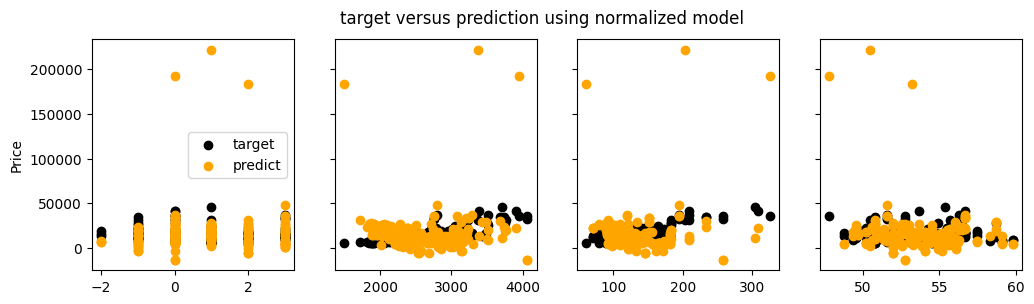

In [117]:
['symboling', 'curbweight', 'enginesize', 'carheight', 'boreratio', 'stroke', 'citympg', 'highwaympg', 'horsepower', 'peakrpm']
df1=df[use_vars]
df2_1 = pd.get_dummies(df['fuelsystem'])
df2_2 = pd.get_dummies(df['cylindernumber'])
df2_3 = pd.get_dummies(df['enginetype'])
df2_4 = pd.get_dummies(df['enginelocation'])
df2_5 = pd.get_dummies(df['carbody'])
df2_6 = pd.get_dummies(df['fueltype'])
df2_7 = pd.get_dummies(df['drivewheel'])
df21 = np.hstack((df2_1,df2_2))
df22 = np.hstack((df21,df2_3))
df23 = np.hstack((df22, df2_4))
df24 = np.hstack((df23, df2_5))
df25 = np.hstack((df24, df2_6))
df2 = np.hstack((df25, df2_7))

X1 = np.hstack((df1.drop('horsepower', axis = 1),df2))
t = df['price']

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

sgdr = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.01)
sgdr.fit(X_norm, t)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X1[:,i],t, label = 'target', color = 'black')
    ax[i].scatter(X1[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()


In [120]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Ahora lo hacemos para un conjunto de prueba del 20%
X_train, X_test, y_train, y_test = train_test_split(X_norm, t, test_size=0.20, random_state=42)

#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

#Test score
sgdr.score(X_test,y_test)

np.random.seed(2)
model = Sequential()

input_dim = 34
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

num_epochs = 100


SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 7, number of weight updates: 1149.0
model parameters:                   w: [15182.45713354], b:[-2.20893137e+03  3.68803999e+03  6.66175691e+03 -1.49410192e+03
 -9.66791388e+02 -2.73689866e+03 -4.56823543e+02 -9.28644914e+02
  3.13677696e+03 -4.22026028e+02  1.53063700e+01 -1.53063700e+01
 -2.86399152e+03 -6.06718324e+01 -1.38351639e+03  2.71121066e+02
 -9.46303608e+01  3.73214096e+03 -3.63420334e+01  2.58742368e+01
 -2.11702971e+03 -2.97936196e+00  1.55431426e+03 -1.12634184e+03
  4.75329590e+03 -8.20690928e+02 -1.44053936e+03 -3.25678398e+03
 -1.06298462e+03  1.69197032e+04 -3.63420334e+01 -3.09309447e+02
  1.75810805e+03 -3.54770350e+02  1.53063700e+01  1.50662336e+03
 -1.58053694e+03 -1.30588519e+02 -6.22777568e+01 -3.94847732e+02
  7.85787571e+02 -6.34014589e+02  5.42695414e+02 -5.42695414e+02]
Model: "sequential_38"
_________________________________________________________________
 